In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df = df.drop(columns=['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])

In [4]:
df.columns = ['gendre', 'math_score', 'reading_score', 'writing_score']
copy_df = df

In [5]:
df.head()

,gendre,math_score,reading_score,writing_score
0,female,72,72,74
1,female,69,90,88
2,female,90,95,93
3,male,47,57,44
4,male,76,78,75


In [6]:
df.isnull().sum()

gendre           0
math_score       0
reading_score    0
writing_score    0
dtype: int64

In [7]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<Axes: xlabel='math_score'>

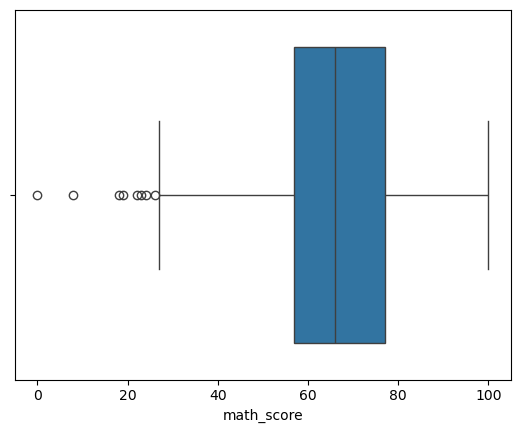

In [8]:
sns.boxplot(x = df['math_score'])

In [9]:
max_limit = df['math_score'].quantile(0.96)
max_limit

92.0

In [10]:
min_limit = df['math_score'].quantile(0.04)
min_limit

39.96

In [11]:
df[(df['math_score'] >= max_limit.round(2)) | (df['math_score'] <= min_limit.round(2))]

,gendre,math_score,reading_score,writing_score
9,female,38,60,50
17,female,18,32,28
34,male,97,87,82
55,female,33,41,43
59,female,0,17,10
...,...,...,...,...
934,male,98,87,90
950,male,94,73,71
957,female,92,100,100
962,female,100,100,100


# Trimming outlier rows:

In [12]:
df = df.query('@min_limit < math_score < @max_limit')
df.head()

,gendre,math_score,reading_score,writing_score
0,female,72,72,74
1,female,69,90,88
2,female,90,95,93
3,male,47,57,44
4,male,76,78,75


In [13]:
df.describe()

,math_score,reading_score,writing_score
count,919.000000,919.000000,919.000000
mean,66.294886,69.348205,68.315560
std,12.356765,12.860682,13.344133
min,40.000000,31.000000,34.000000
25%,58.000000,60.000000,59.000000
50%,66.000000,70.000000,69.000000
75%,76.000000,78.000000,78.000000
max,91.000000,100.000000,100.000000


<Axes: xlabel='math_score'>

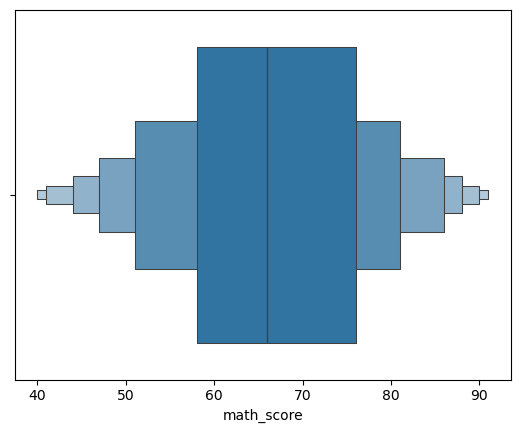

In [14]:
sns.boxenplot(x = df['math_score'])

<Axes: xlabel='math_score'>

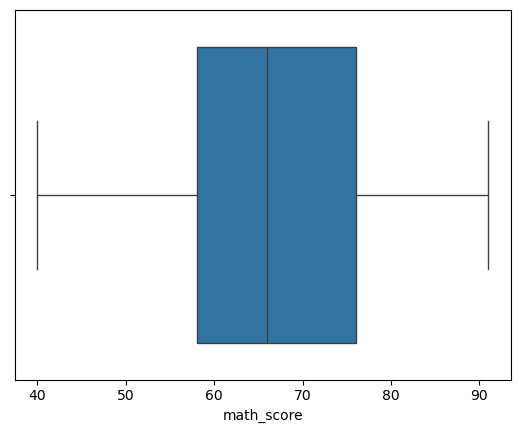

In [15]:
sns.boxplot(x = df['math_score'])

# Capping outlier rows:

In [16]:
copy_df['math_score'] = copy_df['math_score'].clip(lower= min_limit, upper= max_limit)

In [19]:
copy_df.describe()

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.295400,69.169000,68.054000
std,13.971263,14.600192,15.195657
min,39.960000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,92.000000,100.000000,100.000000


<Axes: xlabel='math_score'>

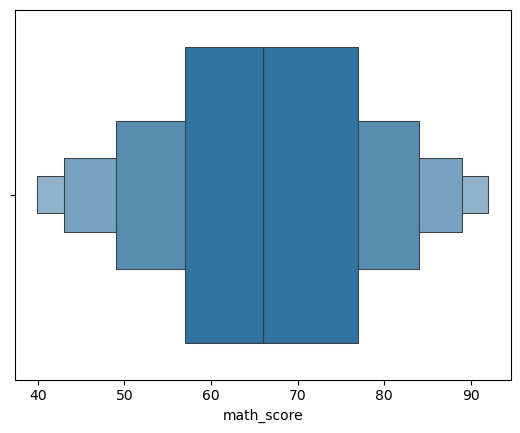

In [20]:
sns.boxenplot(x = copy_df['math_score'])

<Axes: xlabel='math_score'>

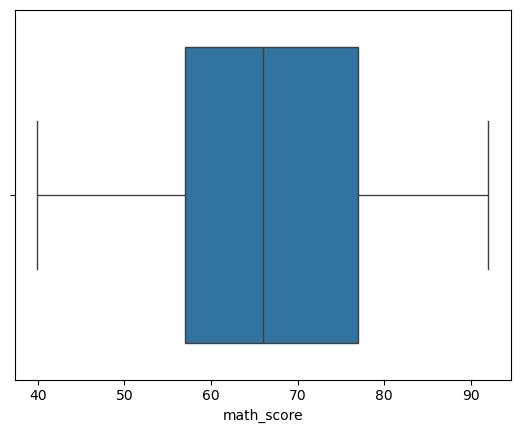

In [21]:
sns.boxplot(x = copy_df['math_score'])